In [80]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [81]:
diabetes = datasets.load_diabetes()

In [94]:
# print(list(diabetes))
# print(diabetes['DESCR'])

In [95]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
draft = df
df.shape

(442, 10)

In [96]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

---
- **UTILISER PANDAS POUR DETECTER LES VALEURS ABERRANTES(OUTLIERS)**

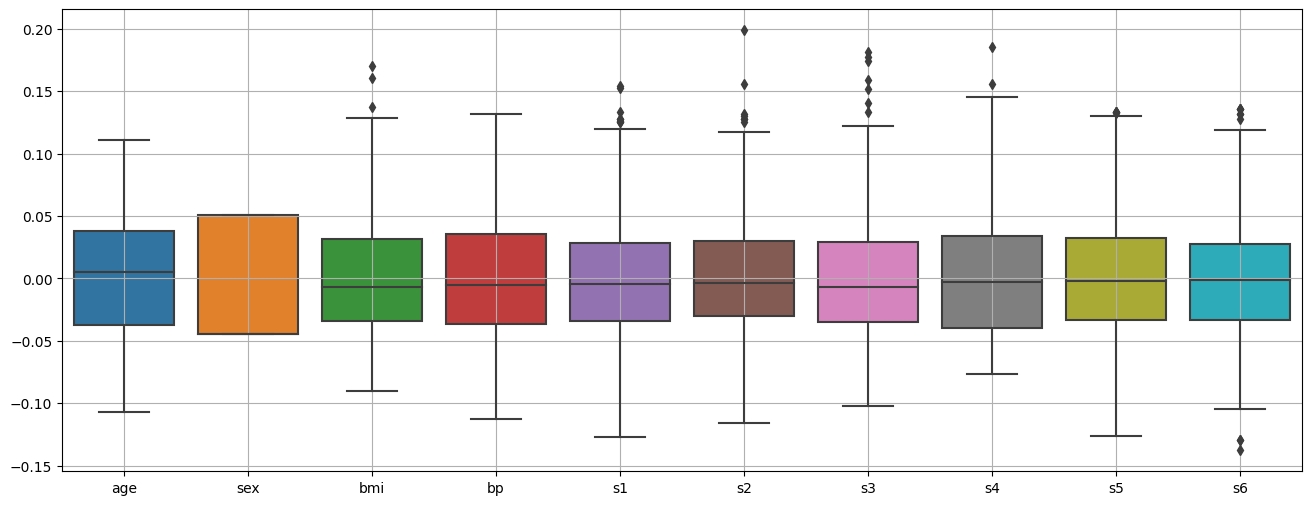

In [97]:
def myboxplot(data = df):
    plt.figure(figsize = (16,6))
    sns.boxplot(data = df)
    plt.grid()
    plt.show()
myboxplot()

---
- UTILISER **SEABORN** POUR DETECTER LES VALEURS ABERRANTES(OUTLIERS)

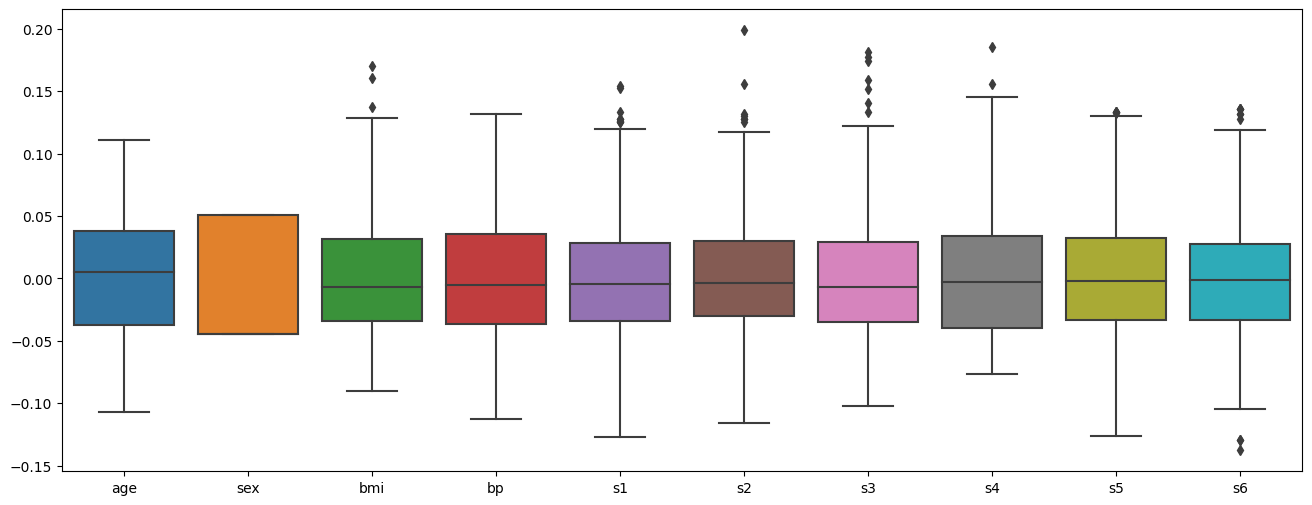

In [98]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df)
plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [100]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [101]:
df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]

---
- **ALGO POUR REMPLACER LES OUTLIERS**

In [102]:
def impute_outliers(df, colname):
    q1 = np.percentile(df[colname], 25)
    q3 = np.percentile(df[colname], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[colname] < lower_bound, colname] = lower_bound
    df.loc[df[colname] > upper_bound, colname] = upper_bound

---
- **REMPLACER L'ENSEMBLES DES VALEURS ABERRANTES**

In [ ]:
for colname in df.columns:
    impute_outliers(df, colname)

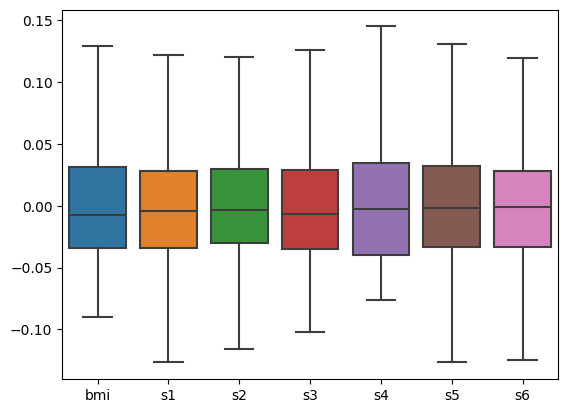

In [93]:
sns.boxplot(data = df)
plt.show()

---
- **RECUPERER TOUS LES OUTLIERS**

**SUPPRESSION DES VALEURS ABERRANTES**

In [ ]:
def drop_outliers(df, colname):
    Q1 = np.percentile(df[colname], 25)
    Q3 = np.percentile(df[colname], 75)
    limit = 1.5*(Q3 - Q1)
    
    df.drop(df[df[colname] > limit + Q3].index, inplace = True)
    df.drop(df[df[colname] < Q1 - limit].index, inplace = True)

In [ ]:
for colname in draft.columns:
    drop_outliers(draft, colname)